## Text analysis ##

Attempt to treat the overview of the films:

https://regex101.com/

https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.replace.html

In [1]:
%matplotlib inline

import configparser
import os

import requests
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
from sklearn import preprocessing, decomposition
import librosa
import IPython.display as ipd
import json
from imdb import IMDb
import tmdbsimple as tmdb
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from collections import OrderedDict
from pygsp import graphs, filters, plotting

plt.rcParams['figure.figsize'] = (17, 5)
plotting.BACKEND = 'matplotlib'


2018-01-22 17:51:39,570:[WARNING](pygsp.graphs.nngraphs.nngraph.<module>): Cannot import pyflann (used for faster kNN computations): Traceback (most recent call last):
  File "C:\Users\Conda\lib\site-packages\pygsp\graphs\nngraphs\nngraph.py", line 14, in <module>
    import pyflann as pfl
  File "C:\Users\Conda\lib\site-packages\pyflann\__init__.py", line 27, in <module>
    from pyflann.index import *
  File "C:\Users\Conda\lib\site-packages\pyflann\index.py", line 27, in <module>
    from pyflann.bindings.flann_ctypes import *
  File "C:\Users\Conda\lib\site-packages\pyflann\bindings\__init__.py", line 30, in <module>
    from pyflann.bindings.flann_ctypes import *
  File "C:\Users\Conda\lib\site-packages\pyflann\bindings\flann_ctypes.py", line 171, in <module>
    raise ImportError('Cannot load dynamic library. Did you compile FLANN?')
ImportError: Cannot load dynamic library. Did you compile FLANN?



In [2]:
df = pd.read_csv('Saved_Datasets/NewFeaturesDataset.csv')

In [3]:
df.head()

,id,budget,genres,imdb_id,overview,production_companies,release_date,revenue,title,director_name,actor_names,Metacritic,ROI,success
0,12,94000000,Animation|Family,266543,"Nemo, an adventurous young clownfish, is unexp...",Pixar Animation Studios,2003-05-30,940335536,Finding Nemo,Andrew Stanton,"['Albert Brooks', 'Ellen DeGeneres', 'Alexande...",90,2.639,4
1,16,12800000,Drama|Crime|Music,168629,"Selma, a Czech immigrant on the verge of blind...",Fine Line Features,2000-05-17,40031879,Dancer in the Dark,Lars von Trier,"['Björk', 'Catherine Deneuve', 'David Morse', ...",61,2.127,3
2,22,140000000,Adventure|Fantasy|Action,325980,"Jack Sparrow, a freewheeling 17th-century pira...",Walt Disney Pictures,2003-09-07,655011224,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,"['Johnny Depp', 'Geoffrey Rush', 'Orlando Bloo...",63,2.639,4
3,24,30000000,Action|Crime,266697,An assassin is shot at the altar by her ruthle...,Miramax Films,2003-10-10,180949000,Kill Bill: Vol. 1,Quentin Tarantino,"['Uma Thurman', 'Lucy Liu', 'Vivica A. Fox', '...",69,2.639,4
4,25,72000000,Drama|War,418763,Jarhead is a film about a US Marine Anthony Sw...,Universal Pictures,2005-04-11,96889998,Jarhead,Sam Mendes,"['Jamie Foxx', 'Scott MacDonald', 'Lucas Black...",58,0.346,2


### 1. Tokenization example ###

In [4]:
tokens = word_tokenize(df['overview'][34])

In [5]:
tokens

['Twenty-eight',
 'days',
 'after',
 'a',
 'killer',
 'virus',
 'was',
 'accidentally',
 'unleashed',
 'from',
 'a',
 'British',
 'research',
 'facility',
 ',',
 'a',
 'small',
 'group',
 'of',
 'London',
 'survivors',
 'are',
 'caught',
 'in',
 'a',
 'desperate',
 'struggle',
 'to',
 'protect',
 'themselves',
 'from',
 'the',
 'infected',
 '.',
 'Carried',
 'by',
 'animals',
 'and',
 'humans',
 ',',
 'the',
 'virus',
 'turns',
 'those',
 'it',
 'infects',
 'into',
 'homicidal',
 'maniacs',
 '--',
 'and',
 'it',
 "'s",
 'absolutely',
 'impossible',
 'to',
 'contain',
 '.']

We can even set all characters to lower case

In [6]:
tokens[0].lower()

'twenty-eight'

In [7]:
print('Initial number of tokens is {}'.format(len(tokens)))

Initial number of tokens is 58


In [8]:
clean_tokens = tokens[:] 
sr = stopwords.words('english') 

unwanted = "!.,--1234567890<>A?():"
sr.extend(unwanted)
sr.extend(['The', "'s"])

for token in tokens:
    if token in sr: 
        clean_tokens.remove(token)

In [9]:
print(sr)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
clean_tokens

['Twenty-eight',
 'days',
 'killer',
 'virus',
 'accidentally',
 'unleashed',
 'British',
 'research',
 'facility',
 'small',
 'group',
 'London',
 'survivors',
 'caught',
 'desperate',
 'struggle',
 'protect',
 'infected',
 'Carried',
 'animals',
 'humans',
 'virus',
 'turns',
 'infects',
 'homicidal',
 'maniacs',
 '--',
 'absolutely',
 'impossible',
 'contain']

In [11]:
print('Number of tokens after cleaning is {}'.format(len(clean_tokens)))

Number of tokens after cleaning is 30


In [12]:
freq = nltk.FreqDist(clean_tokens) 

for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

Twenty-eight:1
days:1
killer:1
virus:2
accidentally:1
unleashed:1
British:1
research:1
facility:1
small:1
group:1
London:1
survivors:1
caught:1
desperate:1
struggle:1
protect:1
infected:1
Carried:1
animals:1
humans:1
turns:1
infects:1
homicidal:1
maniacs:1
--:1
absolutely:1
impossible:1
contain:1


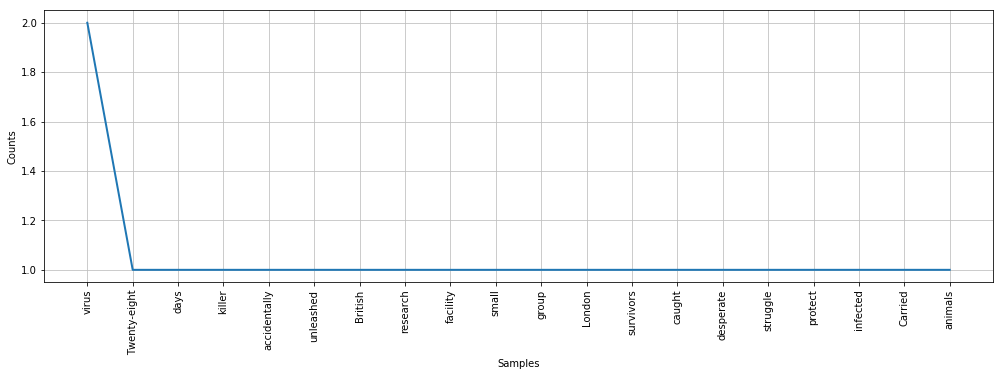

In [13]:
freq.plot(20, cumulative=False)

In [14]:
freq.items()

dict_items([('Twenty-eight', 1), ('days', 1), ('killer', 1), ('virus', 2), ('accidentally', 1), ('unleashed', 1), ('British', 1), ('research', 1), ('facility', 1), ('small', 1), ('group', 1), ('London', 1), ('survivors', 1), ('caught', 1), ('desperate', 1), ('struggle', 1), ('protect', 1), ('infected', 1), ('Carried', 1), ('animals', 1), ('humans', 1), ('turns', 1), ('infects', 1), ('homicidal', 1), ('maniacs', 1), ('--', 1), ('absolutely', 1), ('impossible', 1), ('contain', 1)])

In [15]:
freq.keys()

dict_keys(['Twenty-eight', 'days', 'killer', 'virus', 'accidentally', 'unleashed', 'British', 'research', 'facility', 'small', 'group', 'London', 'survivors', 'caught', 'desperate', 'struggle', 'protect', 'infected', 'Carried', 'animals', 'humans', 'turns', 'infects', 'homicidal', 'maniacs', '--', 'absolutely', 'impossible', 'contain'])

In [16]:
val = list(freq.values())
val

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [17]:
#for key,val in freq.items():
#    print('key is {} and val is {}'.format(key, val))

### 2. Tokenization on the whole dataset ###

Perform tokenization on the whole dataset

In [18]:
overviewDic = {}

sr = stopwords.words('english') 
unwanted = "!.,--1234567890<>A?()\'':"  
sr.extend(unwanted)
sr.extend(['The', "'s", 'But', 'When', 'In', 'As', 'After', '-', '"', "''", '...', '--', '’', '–', '``', "n't", 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
sr.extend(['get', 'set', 'go', 'based', 'meets', 'around', 'named', 'comes', 'even', 'come', 'decides', 'however', 'goes', 'also', 'behind', 'turns', 'must', 'finds', 'put', 'sets', 'takes'])

for i in range(0, len(df)):
    # avoid repititions in the list
    tokens = list(set(word_tokenize(df['overview'][i].lower())))
    
    clean_tokens = tokens[:] 
    
    for token in tokens: 
        if token in sr: 
            clean_tokens.remove(token)

    #for token in tokens: 
    #    if token in stopwords.words('english'): 
    #        clean_tokens.remove(token)
    #    elif token in unwanted:
    #        clean_tokens.remove(token)
    
    overviewDic.setdefault(i, []) 
    overviewDic[i] = clean_tokens

Example on the first film (Finding Nemo)

In [19]:
overviewDic[0]

['friendly',
 'young',
 'meeting',
 'fish',
 'office',
 'reef',
 'dory',
 'hypnotic',
 'bring',
 'surfer',
 'unexpectedly',
 'along',
 'forgetful',
 'home',
 'marlin',
 'worrisome',
 'jellyfish',
 'vegetarian',
 'seagulls',
 'dentist',
 'barrier',
 'sharks',
 'adventurous',
 'taken',
 'clownfish',
 'aquarium',
 'hungry',
 'turtles',
 'nemo',
 'great',
 'way',
 'dude',
 'father']

### 3. Data exploration ### 
Exploration of the words of the overviews of the movies

#### 3.1 Most common words ####
Exploration of the most common words used in film independant of genre

In [20]:
ls = []

for i in range(0, len(overviewDic)):
    ls.extend(overviewDic[i])

In [21]:
len(ls)

68247

In [22]:
CleanedWords = pd.DataFrame(ls)
CleanedWords.head()

,0
0,friendly
1,young
2,meeting
3,fish
4,office


In [23]:
CleanedWords.to_csv('Saved_Datasets/MostCommonWords.csv', index=False)

In [24]:
freq = nltk.FreqDist(ls) 

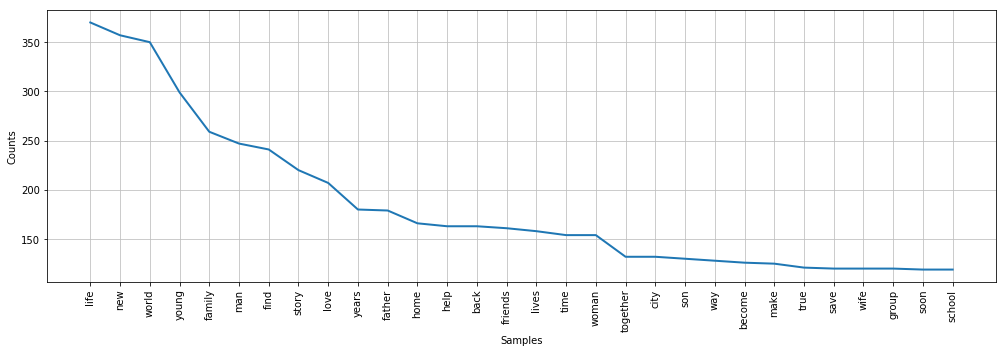

In [25]:
freq.plot(30, cumulative=False)

In [26]:
freq.most_common(50)

[('life', 370),
 ('new', 357),
 ('world', 350),
 ('young', 299),
 ('family', 259),
 ('man', 247),
 ('find', 241),
 ('story', 220),
 ('love', 207),
 ('years', 180),
 ('father', 179),
 ('home', 166),
 ('help', 163),
 ('back', 163),
 ('friends', 161),
 ('lives', 158),
 ('time', 154),
 ('woman', 154),
 ('together', 132),
 ('city', 132),
 ('son', 130),
 ('way', 128),
 ('become', 126),
 ('make', 125),
 ('true', 121),
 ('save', 120),
 ('wife', 120),
 ('group', 120),
 ('soon', 119),
 ('school', 119),
 ('war', 118),
 ('team', 116),
 ('take', 113),
 ('friend', 111),
 ('first', 110),
 ('becomes', 109),
 ('day', 109),
 ('girl', 108),
 ('town', 107),
 ('mysterious', 106),
 ('york', 105),
 ('film', 103),
 ('best', 103),
 ('past', 102),
 ('mother', 102),
 ('discovers', 100),
 ('death', 98),
 ('daughter', 97),
 ('american', 97),
 ('old', 95)]

In [27]:
mostCommon = freq.most_common()
mostCommon[0][0]

'life'

#### 3.2 Words commonly associated to success or not ####

In [28]:
NB_WORDS = 100
words = []

for i in range(0, NB_WORDS):
    words.append(mostCommon[i][0])

List of the most common words associated to movies that were successful

In [29]:
print(words) 

['life', 'new', 'world', 'young', 'family', 'man', 'find', 'story', 'love', 'years', 'father', 'home', 'help', 'back', 'friends', 'lives', 'time', 'woman', 'together', 'city', 'son', 'way', 'become', 'make', 'true', 'save', 'wife', 'group', 'soon', 'school', 'war', 'team', 'take', 'friend', 'first', 'becomes', 'day', 'girl', 'town', 'mysterious', 'york', 'film', 'best', 'past', 'mother', 'discovers', 'death', 'daughter', 'american', 'old', 'former', 'gets', 'people', 'agent', 'mission', 'discover', 'secret', 'forced', 'work', 'begins', 'evil', 'high', 'forces', 'police', 'men', 'job', 'order', 'relationship', 'living', 'couple', 'house', 'small', 'last', 'night', 'away', 'boy', 'stop', 'left', 'turn', 'brother', 'fight', 'real', 'events', 'earth', 'good', 'journey', 'could', 'falls', 'battle', 'tries', 'john', 'returns', 'dangerous', 'college', 'end', 'year', 'things', 'plan', 'face', 'across']


In [30]:
wordSuccess = np.zeros(len(mostCommon), dtype=float) #words

for i in range(0, len(df)): 
    SuccessTokens = list(set(word_tokenize(df['overview'][i].lower())))
    
    for j in range(0, len(mostCommon)): #words
        if mostCommon[j][0] in SuccessTokens:
            if df['success'][i] == 1:
                wordSuccess[j] += (1/mostCommon[j][1])*100

In [31]:
print(words[1])
print(wordSuccess[1])

new
22.1288515406


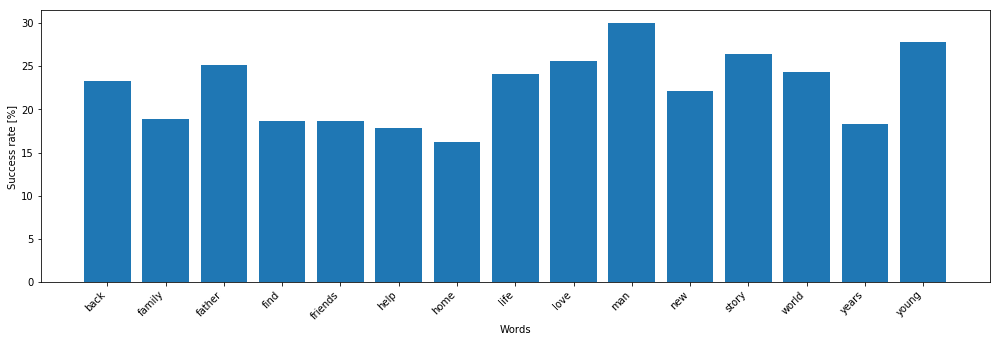

In [32]:
plt.bar(words[:15], wordSuccess[:15], align='center');
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Words');
plt.ylabel('Success rate [%]');
plt.savefig('images/TopSuccessWords.png', dpi =300, bbox_inches='tight')

#### 3.3 Determine top 100 words with the highest success rate ####

In [33]:
NEIGHBORS = 100

#sort the order of the weights
sort_order = np.argsort(-wordSuccess, axis = 0)

topWord = []
topWordSuccess = np.zeros(NEIGHBORS)

for i in range (0, NEIGHBORS):  
    topWord.append(mostCommon[sort_order[i]][0])
    topWordSuccess[i] = wordSuccess[sort_order[i]]

In [34]:
print(topWord)
print(topWordSuccess)

['reagan', 'shootout', 'metallica', 'alexandria', 'jerrica', 'i.', 'davus', 'hoax', '1921', 'autobahns', 'backpacker', 'christianity', 'hypatia', 'philosopher', 'hansen', 'recording', 'urgent', 'imelda', 'roadie', 'cathcart', 'frenzy', 'hooligan', 'wish-granting', 'setup', 'karl', 'reveries', 'simpler', 'promoters', 'malby', 'ryden', 'milwaukee', '937', 'dahmer', 'jesuit', 'wisconsin', 'exposer', 'whales', 'anti-semitic', 'jem', 'audrey', 'portray', 'mae', 'oily', 'initiates', 'folksinger', 'suribachi', 'rosenthal', 'coercive', 'lovelace', 'gagnon', 'remembering', 'itches', 'emir', 'amar', 'ptsd', 'clings', 'atone', 'cyber', 'hyper-linked', 'pitcher', 'music-driven', 'atm', 'tenley', 'biel', 'kubic', 'pyke', 'staunton', 'sightings', 'benton', 'stroke', 'reinvented', 'congo', 'personas', 'natasha', 'gilded', 'inauguration', 'barrymore', 'parachute', 'cirque', 'bearded', 'darren', 'brutality', 'sag', 'mum', 'orphanages', 'communism', 'dynamite', 'adulterated', 'kubiš', 'malt', 'convert',

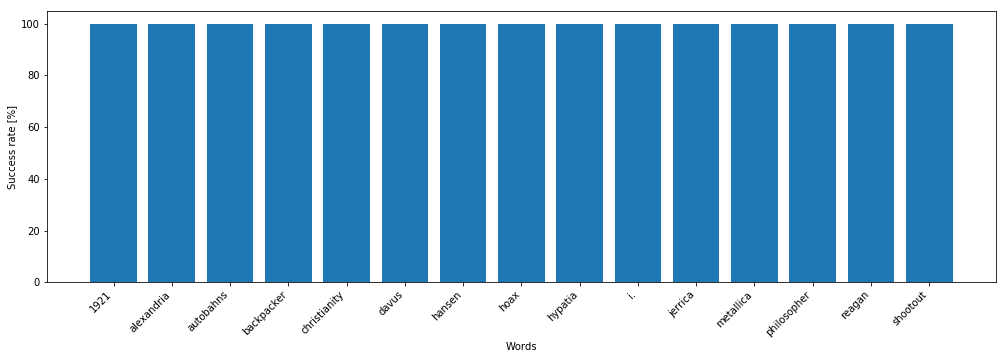

In [35]:
plt.bar(topWord[:15], topWordSuccess[:15], align='center');
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Words');
plt.ylabel('Success rate [%]');

These words all have an 100% success rate, but don't appear very often! See the graph below

In [36]:
nbCounts = []

for i in range(0, len(topWord)):
    nbCounts.append(mostCommon[sort_order[i]][1])

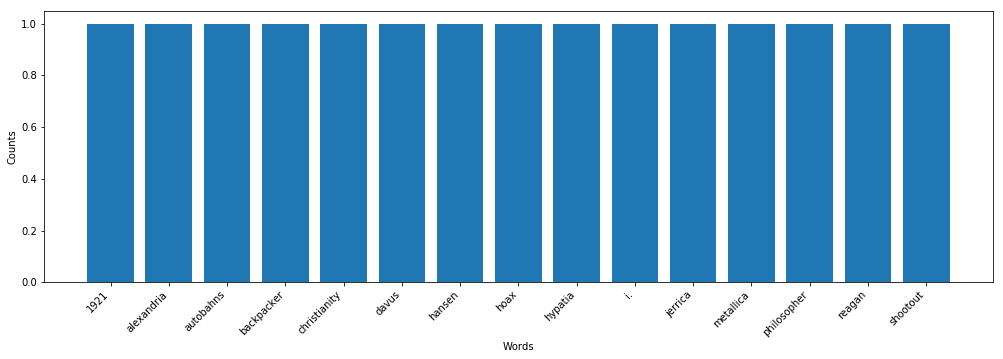

In [37]:
plt.bar(topWord[:15], nbCounts[:15], align='center');
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Words');
plt.ylabel('Counts');

#### 3.4 Determine top 100 words with the highest success rate and that appear at least 100 times in the dataset ####

In [38]:
wordSuccess = np.zeros(len(mostCommon), dtype=float) 

for i in range(0, len(df)): 
    SuccessTokens = list(set(word_tokenize(df['overview'][i].lower())))
    
    for j in range(0, len(mostCommon)): #words
        if mostCommon[j][0] in SuccessTokens:
            if mostCommon[j][1] >= 100:
                if df['success'][i] == 1:
                    wordSuccess[j] += (1/mostCommon[j][1])*100

In [39]:
NEIGHBORS = 100

#sort the order of the weights
sort_order = np.argsort(-wordSuccess, axis = 0)

topWord = []
topWordSuccess = np.zeros(NEIGHBORS)

for i in range (0, NEIGHBORS):  
    topWord.append(mostCommon[sort_order[i]][0])
    topWordSuccess[i] = wordSuccess[sort_order[i]]

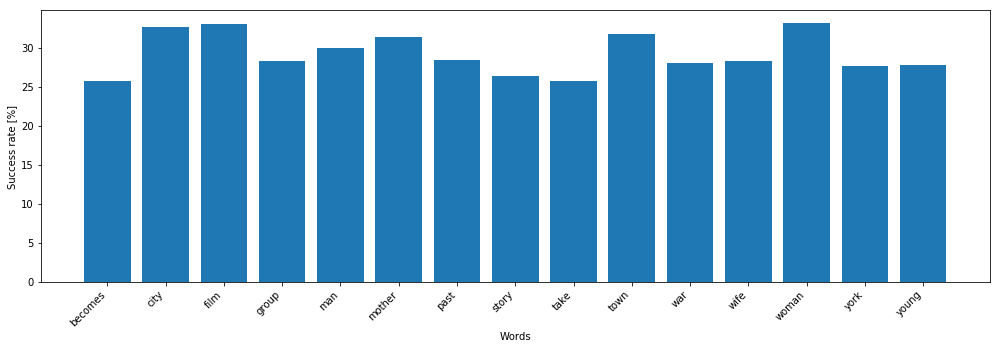

In [40]:
plt.bar(topWord[:15], topWordSuccess[:15], align='center');
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Words');
plt.ylabel('Success rate [%]');

In [41]:
print(topWord)

['woman', 'film', 'city', 'town', 'mother', 'man', 'past', 'group', 'wife', 'war', 'young', 'york', 'story', 'becomes', 'take', 'love', 'father', 'team', 'become', 'world', 'life', 'lives', 'discovers', 'day', 'first', 'back', 'son', 'mysterious', 'friend', 'save', 'new', 'make', 'soon', 'best', 'girl', 'time', 'together', 'family', 'find', 'friends', 'years', 'help', 'true', 'way', 'home', 'school', 'commoners', 'mage', 'powerless', 'depose', 'role-playing', 'prosperity', 'birch', 'savina', 'mages', 'thora', 'empress', 'good-vs.-evil', 'izmer', 'bynes', 'amacor', 'gobi', 'boxcar', 'mongolia', 'unproductive', 'copilot', 'kaylee', 'big-time', 'stretching', 'giamatti', 'malevolently', 'profion', 'c-119', 'shell', 'pasta', 'neptune', 'connolly', 'behaved', 'delicious', 'plotting', 'misadventure', 'imposter', 'still-green', 'womanizing', 'digger', 'revenge-seeking', 'skinheads', '1983.', 'astro-training', 'canon', 'lots', 'ham', 'luna', 'stuff-style', 'evp', 'electronic', 'neutral', 'court

#### 3.5 Determine the least common words ####

Determine the 30 least common words

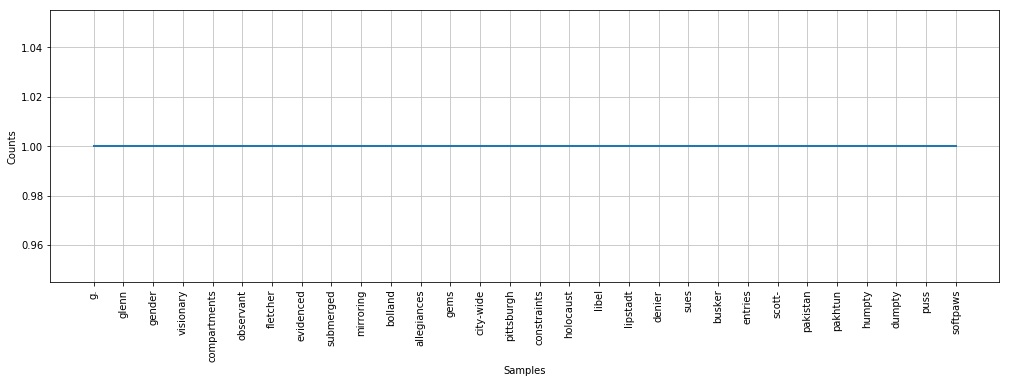

In [42]:
last = nltk.FreqDist(dict(freq.most_common()[-30:]))
last.plot()

In [43]:
last

FreqDist({'allegiances': 1,
          'bolland': 1,
          'busker': 1,
          'city-wide': 1,
          'compartments': 1,
          'constraints': 1,
          'denier': 1,
          'dumpty': 1,
          'entries': 1,
          'evidenced': 1,
          'fletcher': 1,
          'g.': 1,
          'gems': 1,
          'gender': 1,
          'glenn': 1,
          'holocaust': 1,
          'humpty': 1,
          'libel': 1,
          'lipstadt': 1,
          'mirroring': 1,
          'observant': 1,
          'pakhtun': 1,
          'pakistan': 1,
          'pittsburgh': 1,
          'puss': 1,
          'scott-': 1,
          'softpaws': 1,
          'submerged': 1,
          'sues': 1,
          'visionary': 1})

#### 3.6 Determine words with the lowest success rate ####

In [44]:
NEIGHBORS = 100

#sort the order of the weights
sort_order = np.argsort(wordSuccess, axis = 0)

lowWord = []
lowWordSuccess = np.zeros(NEIGHBORS)

for i in range (0, NEIGHBORS):  
    lowWord.append(mostCommon[sort_order[i]][0])
    lowWordSuccess[i] = wordSuccess[sort_order[i]]

In [45]:
print(lowWord)

['advancing', 'luna', 'stuff-style', 'evp', 'electronic', 'neutral', 'courtney', 'club-hopping', 'wimbledon', 'rank', '119.', 'hume', 'neptune', 'ham', 'krab', 'profion', 'commoners', 'mage', 'powerless', 'depose', 'role-playing', 'prosperity', 'birch', 'savina', 'mages', 'thora', 'empress', 'shell', 'lots', 'canon', 'astro-training', 'pacha', 'llama', 'kuzco', 'yzma', 'pluto', 'lunar', '2087', 'mogan', 'terrence', 'injures', 'addicted', 'mcdonagh', 'hurricane', 'alarming', 'looches', 'connolly', 'behaved', 'delicious', 'plotting', 'misadventure', 'imposter', 'pasta', 'womanizing', 'digger', 'revenge-seeking', 'skinheads', '1983.', 'good-vs.-evil', 'izmer', 'c-119', 'amacor', 'established', 'advisors', 'dramatisation', 'sparked', 'missile', 'f', 'missle', 'prejudicial', 'conspires', 'brashear', 'diving', 'triumph', 'policies', 'akasha', 'arisen', 'lestat', 'dammed', 'lioncourt', 'slumber', 'throwing', 'leezak', 'mcnerney', 'pre-marital', 'pontius', 'compilation', 'bam', 'essentially', 

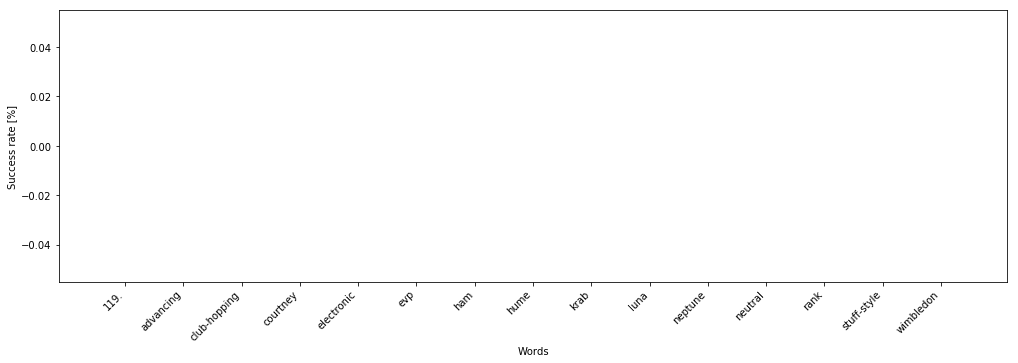

In [46]:
plt.bar(lowWord[:15], lowWordSuccess[:15], align='center');
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right');
plt.xlabel('Words');
plt.ylabel('Success rate [%]');

### 4. Creation of the similarity matrix ###

In this section, we assign a grade based on whether the plot of the movies seem to be similar (similar stories)

#### 4.1 Creation of the similarity matrix based on number of words in common ####

As no normalization was found for this solution, it is not used, but gives an indication of the number of words that appear in both films

In [47]:
TextW = np.ndarray(shape=(len(df), len(df)), dtype=int)

for i in range(0, len(df)):    
    for j in range(i, len(df)):
        
        counts = 0
        
        for k in range(0, len(overviewDic[j])):
            if overviewDic[j][k] in overviewDic[i]:
                counts = counts + 1
    
        TextW[i][j] = counts

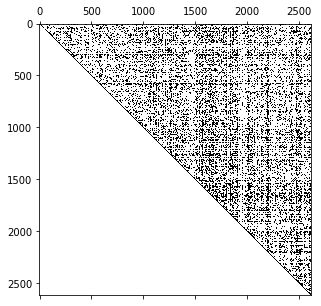

In [48]:
plt.spy(TextW)

In [49]:
#ensure the matrix is symmetric
bigger = TextW.transpose() > TextW
TextW = TextW - TextW*bigger + TextW.transpose()*bigger

#fill the diagonal values to zero, i.e. no self-connections
np.fill_diagonal(TextW, 0)

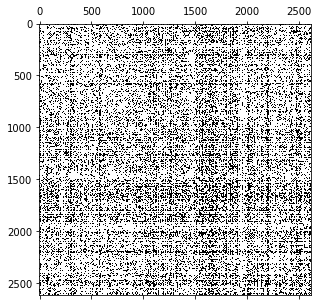

In [50]:
plt.spy(TextW)

In [51]:
print('The mean value: {}'.format(TextW.mean()))
print('The max value: {}'.format(TextW.max()))
print('The min value: {}'.format(TextW.min()))

The mean value: 0.35615805833230585
The max value: 41
The min value: 0


#### 4.2 Creation of similarity matrix based on number of appearances of one of the 100 most frequent words ####

Most frequent $\neq$ highest success rate

$\textbf{Reminder:}$ These are the most common words from the dataset

In [52]:
print(words)

['life', 'new', 'world', 'young', 'family', 'man', 'find', 'story', 'love', 'years', 'father', 'home', 'help', 'back', 'friends', 'lives', 'time', 'woman', 'together', 'city', 'son', 'way', 'become', 'make', 'true', 'save', 'wife', 'group', 'soon', 'school', 'war', 'team', 'take', 'friend', 'first', 'becomes', 'day', 'girl', 'town', 'mysterious', 'york', 'film', 'best', 'past', 'mother', 'discovers', 'death', 'daughter', 'american', 'old', 'former', 'gets', 'people', 'agent', 'mission', 'discover', 'secret', 'forced', 'work', 'begins', 'evil', 'high', 'forces', 'police', 'men', 'job', 'order', 'relationship', 'living', 'couple', 'house', 'small', 'last', 'night', 'away', 'boy', 'stop', 'left', 'turn', 'brother', 'fight', 'real', 'events', 'earth', 'good', 'journey', 'could', 'falls', 'battle', 'tries', 'john', 'returns', 'dangerous', 'college', 'end', 'year', 'things', 'plan', 'face', 'across']


In [53]:
commonWordDic = {}

for i in range(0, len(df)):
    commonWordDic.setdefault(i, [])
    
    for k in range(0, len(overviewDic[i])):
            if overviewDic[i][k] in words:
                commonWordDic[i].append(overviewDic[i][k])

##### 4.2.1 Normalization by greatest number of words#####

$$W_{ij} = \frac{Number \ of \ similar \ common \ words \ between \ i \ and \ j}{Highest \ number \ of \ common \ words \ between \ i \ and \ j}  \in [0; 1]$$

In [54]:
TextW = np.zeros(shape=(len(df), len(df)), dtype=float)
WmaxNorm = np.zeros(shape=(len(df), len(df)), dtype=float)
maxLen = 0

for i in range(0, len(df)):
    for j in range(i, len(df)):
        maxLen = max([len(commonWordDic[i]), len(commonWordDic[j])])
        
        if maxLen != 0:
            #compute the similarity
            for k in range(0, len(commonWordDic[i])):
                if commonWordDic[i][k] in commonWordDic[j]:
                    TextW[i][j] += 1
            
            #normalization by division of the maximum length
            WmaxNorm[i][j] = TextW[i][j]/maxLen
        else:
            #assign a similarity of 1 since neither film has one of the most freq plot words
            TextW[i][j] = 1
            WmaxNorm[i][j] = 1

In [55]:
#ensure the matrix is symmetric
bigger = WmaxNorm.transpose() > WmaxNorm
WmaxNorm = WmaxNorm - WmaxNorm*bigger + WmaxNorm.transpose()*bigger

#fill the diagonal values to zero, i.e. no self-connections
np.fill_diagonal(WmaxNorm, 0)

Do this also for TextW

In [56]:
#ensure the matrix is symmetric
bigger = TextW.transpose() > TextW
TextW = TextW - TextW*bigger + TextW.transpose()*bigger

#fill the diagonal values to zero, i.e. no self-connections
np.fill_diagonal(TextW, 0)

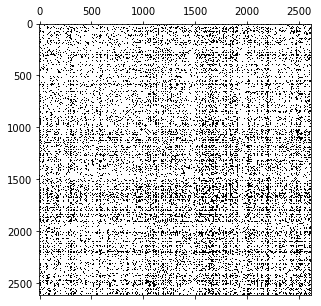

In [57]:
plt.spy(WmaxNorm)

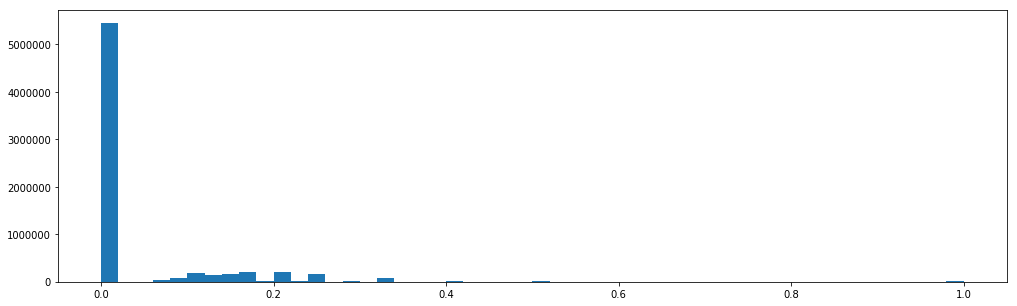

In [58]:
plt.hist(WmaxNorm.reshape(-1), bins=50);

In [59]:
print('The mean value is: {}'.format(WmaxNorm.mean()))
print('The max value is: {}'.format(WmaxNorm.max()))
print('The min value is: {}'.format(WmaxNorm.min()))

The mean value is: 0.03878010310628478
The max value is: 1.0
The min value is: 0.0


Plot the degree distribution

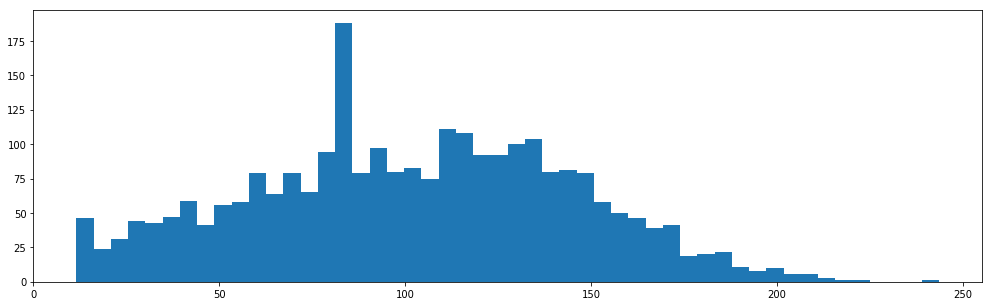

In [60]:
degrees = np.zeros(len(WmaxNorm)) 

#reminder: the degrees of a node for a weighted graph are the sum of its weights

for i in range(0, len(WmaxNorm)):
    degrees[i] = sum(WmaxNorm[i])

plt.hist(degrees, bins=50);

In [61]:
print('The mean value is: {}'.format(degrees.mean()))
print('The max value is: {}'.format(degrees.max()))
print('The min value is: {}'.format(degrees.min()))

The mean value is: 101.64265024157257
The max value is: 243.50931152181073
The min value is: 11.552763902763905


##### 4.2.2 Normalization by inspiration of 75th percentile#####



In [122]:
np.percentile(TextW, 75)

0.0

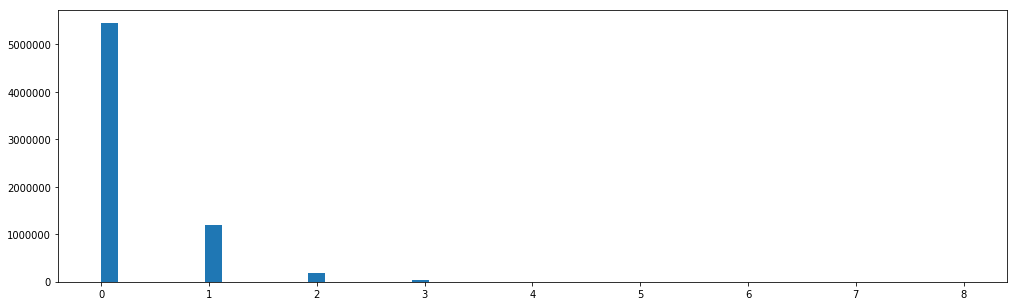

In [99]:
plt.hist(TextW.reshape(-1), bins=50);

In [102]:
print('The mean value is: {}'.format(TextW.mean()))
print('The max value is: {}'.format(TextW.max()))
print('The min value is: {}'.format(TextW.min()))

The mean value is: 0.24397519462807446
The max value is: 8.0
The min value is: 0.0


In [104]:
sum(halfTextW[TextW == 8])

8.0

Normalization:

$$W_{ij} = \begin{cases}0, & Nb \ of \ similar \ common \ words \ between \ i \ and \ j =0 \\ 1, & Nb \ of \ similar \ common \ words \ between \ i \ and \ j \geq 1 \end{cases}$$

In [142]:
WNormPerc = np.zeros(shape=(len(df), len(df)), dtype=float)

for i in range(0, len(df)):
    for j in range(i, len(df)):
        if TextW[i][j] >= 1:
            WNormPerc[i][j] = 1
        #else:
        #    WNormPerc[i][j] = WNormPerc[i][j]/2

In [143]:
#ensure the matrix is symmetric
bigger = WNormPerc.transpose() > WNormPerc
WNormPerc = WNormPerc - WNormPerc*bigger + WNormPerc.transpose()*bigger

#fill the diagonal values to zero, i.e. no self-connections
np.fill_diagonal(WNormPerc, 0)

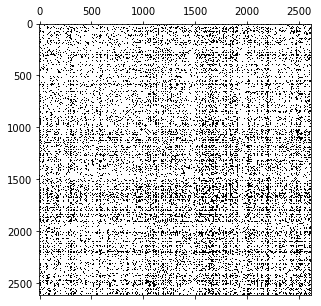

In [144]:
plt.spy(WNormPerc)

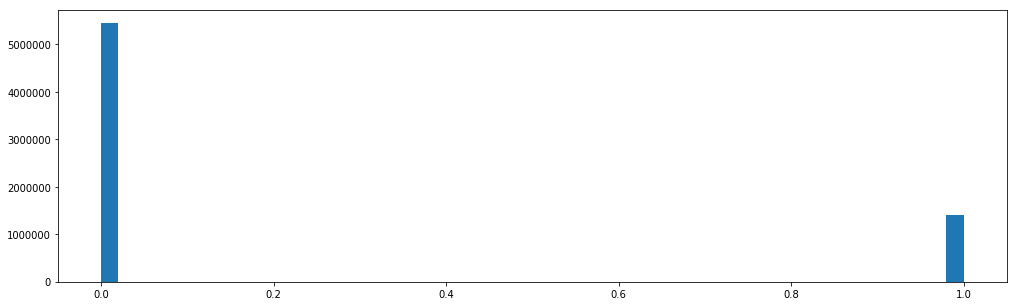

In [145]:
plt.hist(WNormPerc.reshape(-1), bins=50);

#### 4.4 Save the dataset ####

In [70]:
NormW = pd.DataFrame(WmaxNorm)
NormW.head()

,0,1,2,3,4,5,6,7,8,9,...,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620
0,0.0,0.000000,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.25,0.25,...,0.200000,0.000000,0.0,0.25,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.00,0.00,...,0.200000,0.000000,0.0,0.00,0.0,0.2,0.0,0.200000,0.000000,0.000000
2,0.0,0.166667,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.00,0.00,...,0.166667,0.000000,0.0,0.00,0.0,0.0,0.0,0.333333,0.166667,0.166667
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,...,0.166667,0.166667,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [71]:
NormW.to_csv('Saved_Datasets/NormalizedTextW.csv', index=False)

### 5. Graph Laplacian and Embedding for maximum normalization ###

#### 5.1 Compute the graph Laplacian ####

With pygsp

In [127]:
G = graphs.Graph(WmaxNorm)
G.compute_laplacian('normalized')

Normally

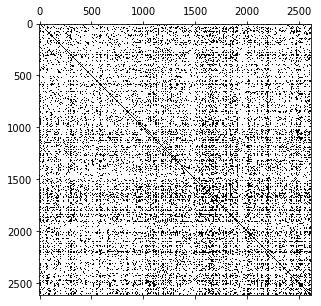

In [128]:
#reminder: L = D - W for weighted graphs
laplacian = np.diag(degrees) - WmaxNorm

#computation of the normalized Laplacian
laplacian_norm = scipy.sparse.csgraph.laplacian(WmaxNorm, normed = True)

plt.spy(laplacian_norm);

In [129]:
laplacian_norm = sparse.csr_matrix(laplacian_norm)

#### 5.2 Compute the Fourier basis ####

With pygsp

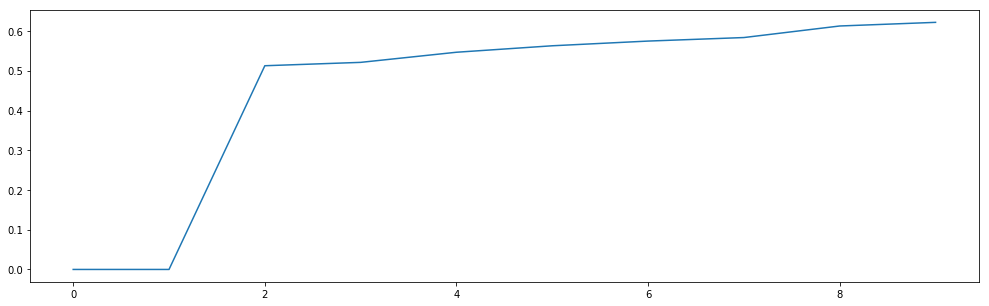

In [130]:
G.compute_fourier_basis(recompute=True)
plt.plot(G.e[0:10]);

In [131]:
print('The value of the 1st eigenvalue is: {}'.format(G.e[1]))

The value of the 1st eigenvalue is: 1.3791094156358285e-15


Normally

In [132]:
eigenvalues, eigenvectors =  sparse.linalg.eigsh(laplacian_norm, k = 10, which = 'SM') 

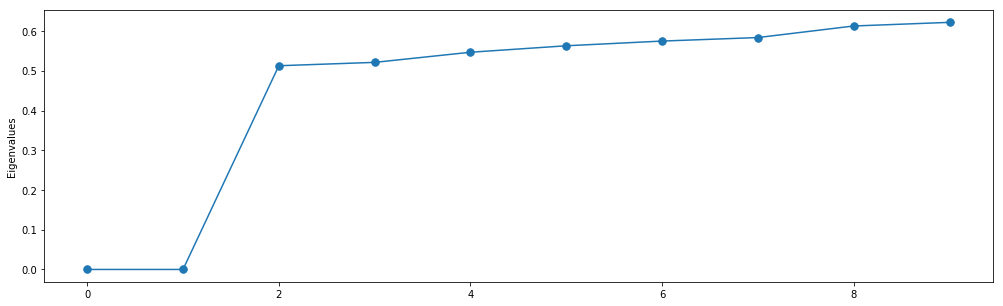

In [133]:
plt.plot(eigenvalues, '.-', markersize=15);
plt.xlabel('')
plt.ylabel('Eigenvalues')
plt.show()

#### 5.3 Graph embedding ####

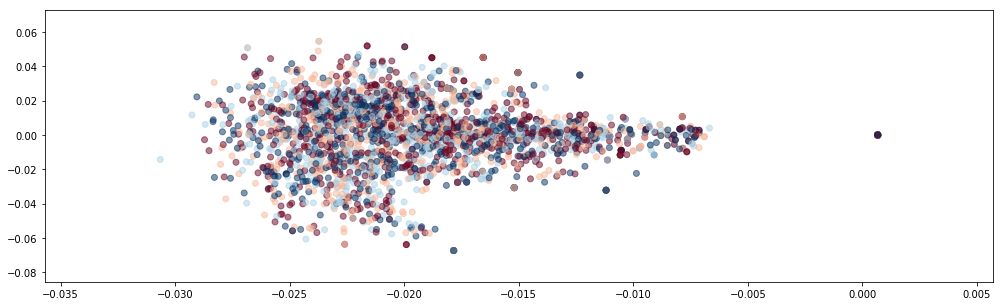

In [134]:
genres = preprocessing.LabelEncoder().fit_transform(df['success'])

x = eigenvectors[:, 1] 
y = eigenvectors[:, 2] 
plt.scatter(x, y, c=genres, cmap='RdBu', alpha=0.5);

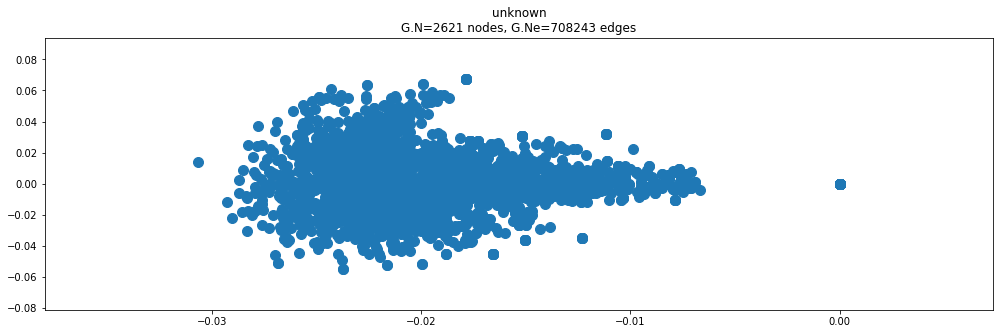

In [135]:
#Note: eigenvalues and their respective eigenvectors are already sorted from smallest to biggest

#plot on the eigenvectors 2 and 3 (set_coordinates takes Nx2 or Nx3 array size)
G.set_coordinates(G.U[:, 1:3])
G.plot()

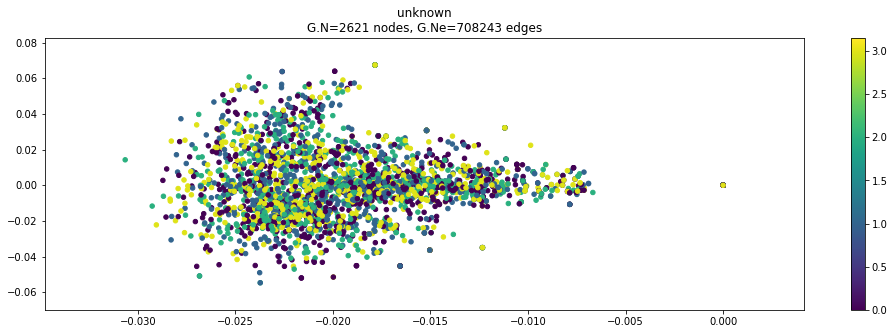

In [136]:
G.plot_signal(genres, vertex_size=20)

### 6. Graph Laplacian and Embedding for 75-percentile normalization ###

#### 6.1. Sparsify (Not needed in the end) ####

NEIGHBORS = 300

#sort the order of the weights
sort_order = np.argsort(weightsNorm, axis = 1)

#declaration of a sorted weight matrix
sorted_weights = np.zeros((len(weightsNorm), len(weightsNorm)))

for i in range (0, len(weightsNorm)):  
    for j in range(0, len(weightsNorm)):
        if (j >= len(weightsNorm) - NEIGHBORS):
            #copy the k strongest edges for each node
            sorted_weights[i, sort_order[i,j]] = weightsNorm[i,sort_order[i,j]]
        else:
            #set the other edges to zero
            sorted_weights[i, sort_order[i,j]] = 0

#ensure the matrix is symmetric
bigger = sorted_weights.transpose() > sorted_weights
sorted_weights = sorted_weights - sorted_weights*bigger + sorted_weights.transpose()*bigger

In [82]:
#plt.spy(sorted_weights)

In [83]:
#plt.hist(sorted_weights.reshape(-1), bins=50);

#### 6.2. Save the dataset ####

In [84]:
NormW = pd.DataFrame(WNormPerc)
NormW.head()

,0,1,2,3,4,5,6,7,8,9,...,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
NormW.to_csv('Saved_Datasets/TextWSparsePerc.csv', index=False)

#### 6.3. Laplacian and graph embedding ####

With pygsp

In [146]:
G = graphs.Graph(WNormPerc)
G.compute_laplacian('normalized')

Other

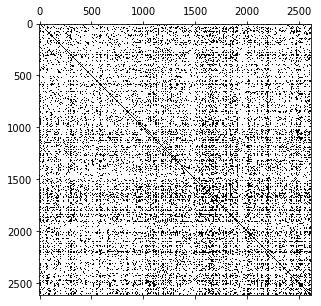

In [147]:
#reminder: L = D - W for weighted graphs
laplacian = np.diag(degrees) - WNormPerc

#computation of the normalized Laplacian
laplacian_norm = scipy.sparse.csgraph.laplacian(WNormPerc, normed = True)

plt.spy(laplacian_norm);

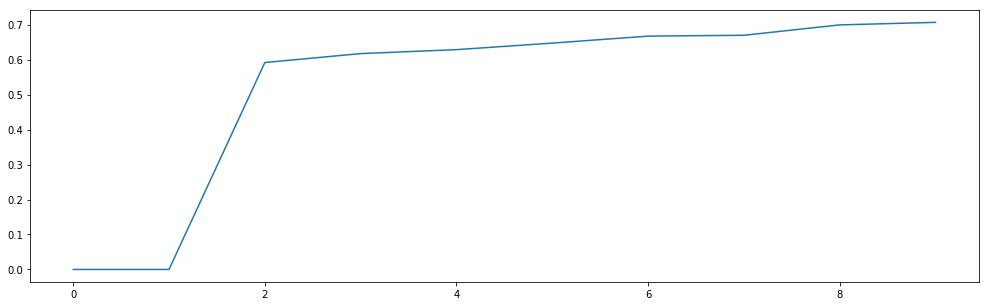

In [148]:
G.compute_fourier_basis(recompute=True)
plt.plot(G.e[0:10]);

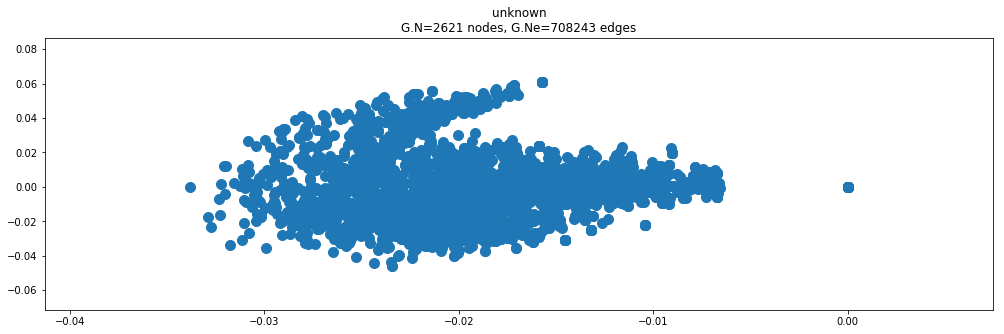

In [149]:
G.set_coordinates(G.U[:, 1:3])
G.plot()

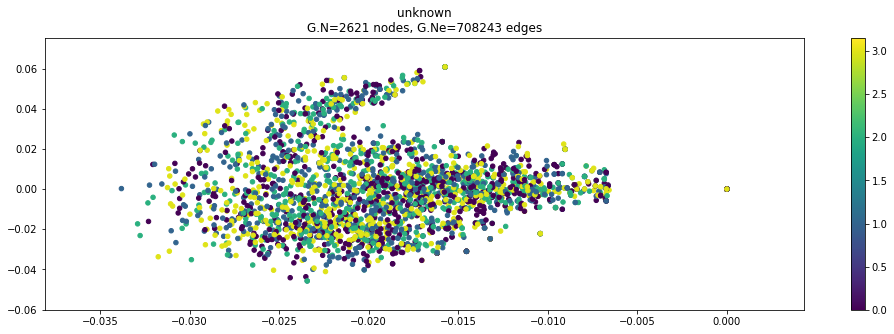

In [150]:
G.plot_signal(genres, vertex_size=20)